#Ensemble Learning


#Theoretical

###1. Can we use Bagging for regression problems
- Yes, Bagging (Bootstrap Aggregating) can be effectively used for regression problems. It involves training multiple regression models on different bootstrap samples of the training data and then averaging their predictions to produce a final, more robust prediction.

### 2. What is the difference between multiple model training and single model training

- Multiple model training (ensemble learning) involves training several models (base learners) and combining their predictions to improve overall performance, robustness, and reduce variance/bias. Single model training, on the other hand, involves training and using just one model for predictions.

### 3. Explain the concept of feature randomness in Random Forest

- Feature randomness in Random Forest refers to the process where, at each split in a decision tree, only a random subset of features is considered for finding the best split. This decorrelates the trees, making the ensemble more robust to noise and preventing overfitting.


### 4. What is OOB (Out-of-Bag) Score
* The Out-of-Bag (OOB) score is an internal validation estimate used in Bagging algorithms like Random Forest. Since each base learner is trained on a bootstrap sample (a subset of the original data), some data points are left out for each learner. These 'out-of-bag' samples can be used to evaluate the performance of the base learner, and their averaged predictions provide an estimate of the model's generalization error without needing a separate validation set.

### 5. How can you measure the importance of features in a Random Forest model
- Feature importance in a Random Forest can be measured by looking at the average reduction in impurity (e.g., Gini impurity for classification, MSE for regression) provided by that feature across all trees in the forest. Alternatively, permutation importance can be used, which measures how much the model's performance decreases when a feature's values are randomly shuffled.

### 6. Explain the working principle of a Bagging Classifier
- A Bagging Classifier works by training multiple base classifiers (typically decision trees) on different bootstrap samples (random samples with replacement) of the training data. For prediction, it aggregates the outputs of these individual classifiers, usually by majority voting for classification tasks, to arrive at a final prediction. This reduces variance and overfitting.

### 7. How do you evaluate a Bagging Classifier’s performance

- A Bagging Classifier's performance can be evaluated using standard metrics such as accuracy, precision, recall, F1-score, and ROC-AUC for classification tasks. Cross-validation is also commonly used. Additionally, the Out-of-Bag (OOB) score provides an internal estimate of generalization performance.

### 8. How does a Bagging Regressor work

- A Bagging Regressor works similarly to a Bagging Classifier, but for regression tasks. It trains multiple base regressors (e.g., decision trees) on different bootstrap samples of the training data. For prediction, it averages the predictions of all individual regressors to produce a more stable and robust final prediction.

### 9. What is the main advantage of ensemble techniques

- The main advantage of ensemble techniques is that they typically lead to significantly better predictive performance (higher accuracy, better generalization) and increased robustness compared to using a single model. They achieve this by reducing bias, variance, or both.

### 10. What is the main challenge of ensemble methods

- The main challenge of ensemble methods often lies in their increased computational cost and complexity compared to single models, both during training and prediction. They can also be harder to interpret, especially complex methods like stacking.

### 11. Explain the key idea behind ensemble techniques

- The key idea behind ensemble techniques is to combine the predictions of multiple individual models (often referred to as 'base learners' or 'weak learners') to achieve a more accurate and robust prediction than any single model could produce on its own. This is based on the principle that a 'wisdom of crowds' approach can overcome individual model weaknesses.

### 12. What is a Random Forest Classifier

- A Random Forest Classifier is an ensemble learning method for classification that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It incorporates both bootstrap aggregating (bagging) and feature randomness.

### 13. What are the main types of ensemble techniques

- The main types of ensemble techniques are Bagging (e.g., Random Forest), Boosting (e.g., AdaBoost, Gradient Boosting, XGBoost, LightGBM), and Stacking. Each category combines models in different ways to achieve improved performance.

### 14. What is ensemble learning in machine learning

- Ensemble learning in machine learning is a meta-approach that combines multiple individual models to obtain better predictive performance than could be obtained from any single constituent model. It aims to reduce generalization error by combining diverse models.

### 15. When should we avoid using ensemble methods

- Ensemble methods should potentially be avoided when computational resources (time, memory) are severely limited, when model interpretability is paramount and a simpler model suffices, or when the base models are already performing very well and the additional complexity provides minimal gain.

### 16. How does Bagging help in reducing overfitting

- Bagging reduces overfitting by training multiple models on different subsets of the data (bootstrap samples). This leads to a diverse set of models, each with slightly different biases. When their predictions are averaged, the variance component of the error is significantly reduced, leading to a more stable and less overfit model.


### 17. Why is Random Forest better than a single Decision Tree

- Random Forest is generally better than a single Decision Tree because it reduces the variance inherent in individual decision trees. While single decision trees are prone to overfitting and can be unstable, Random Forest's use of bagging and feature randomness creates an ensemble of decorrelated trees, leading to a more robust, accurate, and generalized model.

### 18. What is the role of bootstrap sampling in Bagging

- Bootstrap sampling in Bagging creates multiple diverse training datasets by sampling with replacement from the original dataset. Each base model is trained on one of these bootstrap samples. This diversity among training sets helps in creating diverse base models, which when aggregated, reduce the overall variance of the ensemble.

### 19. What are some real-world applications of ensemble techniques

- Real-world applications of ensemble techniques include fraud detection, medical diagnosis, customer churn prediction, recommendation systems, image and speech recognition, stock market prediction, and competitive machine learning (e.g., Kaggle competitions).

### 20. What is the difference between Bagging and Boosting?Theoretical

- Bagging (e.g., Random Forest) trains multiple models independently on different bootstrap samples and then averages their predictions to reduce variance. Boosting (e.g., AdaBoost, Gradient Boosting) trains models sequentially, where each new model tries to correct the errors of the previous ones, focusing on misclassified instances to reduce bias.


#Practical

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, StackingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.datasets import make_classification, make_regression, load_breast_cancer

# Create sample datasets for classification and regression tasks
# Classification dataset
X_cls, y_cls = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

# Regression dataset
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, n_informative=10, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

###21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

In [3]:
bag_clf_dt = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)
bag_clf_dt.fit(X_train_cls, y_train_cls)
y_pred_bag_clf_dt = bag_clf_dt.predict(X_test_cls)
accuracy_bag_clf_dt = accuracy_score(y_test_cls, y_pred_bag_clf_dt)
print(f"Bagging Classifier (Decision Tree) Accuracy: {accuracy_bag_clf_dt:.4f}")


Bagging Classifier (Decision Tree) Accuracy: 0.8700


###22.  Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)


In [4]:
bag_reg_dt = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42), n_estimators=10, random_state=42)
bag_reg_dt.fit(X_train_reg, y_train_reg)
y_pred_bag_reg_dt = bag_reg_dt.predict(X_test_reg)
mse_bag_reg_dt = mean_squared_error(y_test_reg, y_pred_bag_reg_dt)
print(f"Bagging Regressor (Decision Tree) MSE: {mse_bag_reg_dt:.4f}")

Bagging Regressor (Decision Tree) MSE: 10581.2727


###23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores


In [5]:
# Load Breast Cancer dataset
bc = load_breast_cancer()
X_bc, y_bc = bc.data, bc.target
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)

rf_clf_bc = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_bc.fit(X_train_bc, y_train_bc)
y_pred_rf_clf_bc = rf_clf_bc.predict(X_test_bc)
accuracy_rf_clf_bc = accuracy_score(y_test_bc, y_pred_rf_clf_bc)
print(f"Random Forest Classifier (Breast Cancer) Accuracy: {accuracy_rf_clf_bc:.4f}")

feature_importances = pd.Series(rf_clf_bc.feature_importances_, index=bc.feature_names).sort_values(ascending=False)
print("Random Forest Classifier Feature Importances:")
print(feature_importances)

Random Forest Classifier (Breast Cancer) Accuracy: 0.9708
Random Forest Classifier Feature Importances:
mean concave points        0.141934
worst concave points       0.127136
worst area                 0.118217
mean concavity             0.080557
worst radius               0.077975
worst perimeter            0.074292
mean perimeter             0.060092
mean area                  0.053810
worst concavity            0.041080
mean radius                0.032312
area error                 0.029538
worst texture              0.018786
worst compactness          0.017539
radius error               0.016435
worst symmetry             0.012929
perimeter error            0.011770
worst smoothness           0.011769
mean texture               0.011064
mean compactness           0.009216
fractal dimension error    0.007135
worst fractal dimension    0.006924
mean smoothness            0.006223
smoothness error           0.005881
concavity error            0.005816
compactness error          0.004

###24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.


In [6]:
# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)
mse_rf_reg = mean_squared_error(y_test_reg, y_pred_rf_reg)
print(f"Random Forest Regressor MSE: {mse_rf_reg:.4f}")

# Single Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_reg, y_train_reg)
y_pred_dt_reg = dt_reg.predict(X_test_reg)
mse_dt_reg = mean_squared_error(y_test_reg, y_pred_dt_reg)
print(f"Single Decision Tree Regressor MSE: {mse_dt_reg:.4f}")

if mse_rf_reg < mse_dt_reg:
    print("Random Forest Regressor performs better (lower MSE) than a single Decision Tree Regressor.")
else:
    print("Single Decision Tree Regressor performs better or equal (lower or equal MSE) than Random Forest Regressor.")

Random Forest Regressor MSE: 9348.5380
Single Decision Tree Regressor MSE: 21837.7538
Random Forest Regressor performs better (lower MSE) than a single Decision Tree Regressor.


###25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier


In [7]:
rf_clf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42, n_jobs=-1) # n_jobs=-1 for faster computation
rf_clf_oob.fit(X_train_cls, y_train_cls)
oob_score = rf_clf_oob.oob_score_
print(f"Random Forest Classifier OOB Score: {oob_score:.4f}")


Random Forest Classifier OOB Score: 0.9171


###26. Train a Bagging Classifier using SVM as a base estimator and print accuracy


In [8]:
bag_clf_svm = BaggingClassifier(estimator=SVC(random_state=42, probability=True), n_estimators=10, random_state=42, n_jobs=-1)
bag_clf_svm.fit(X_train_cls, y_train_cls)
y_pred_bag_clf_svm = bag_clf_svm.predict(X_test_cls)
accuracy_bag_clf_svm = accuracy_score(y_test_cls, y_pred_bag_clf_svm)
print(f"Bagging Classifier (SVM) Accuracy: {accuracy_bag_clf_svm:.4f}")

Bagging Classifier (SVM) Accuracy: 0.9567


###27. Train a Random Forest Classifier with different numbers of trees and compare accuracy


In [9]:
n_estimators_list = [10, 50, 100, 200]
accuracies = {}
for n in n_estimators_list:
    rf_clf_n = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    rf_clf_n.fit(X_train_cls, y_train_cls)
    y_pred_n = rf_clf_n.predict(X_test_cls)
    accuracies[n] = accuracy_score(y_test_cls, y_pred_n)
    print(f"Random Forest Classifier with {n} trees Accuracy: {accuracies[n]:.4f}")

Random Forest Classifier with 10 trees Accuracy: 0.9067
Random Forest Classifier with 50 trees Accuracy: 0.9100
Random Forest Classifier with 100 trees Accuracy: 0.9167
Random Forest Classifier with 200 trees Accuracy: 0.9200


###28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score


In [10]:
bag_clf_lr = BaggingClassifier(estimator=LogisticRegression(random_state=42, solver='liblinear'), n_estimators=10, random_state=42, n_jobs=-1)
bag_clf_lr.fit(X_train_cls, y_train_cls)
y_pred_proba_bag_clf_lr = bag_clf_lr.predict_proba(X_test_cls)[:, 1]
auc_bag_clf_lr = roc_auc_score(y_test_cls, y_pred_proba_bag_clf_lr)
print(f"Bagging Classifier (Logistic Regression) AUC Score: {auc_bag_clf_lr:.4f}")

Bagging Classifier (Logistic Regression) AUC Score: 0.9126


###29. Train a Random Forest Regressor and analyze feature importance scores


In [ ]:
rf_reg_fi = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg_fi.fit(X_train_reg, y_train_reg)
feature_importances_reg = pd.Series(rf_reg_fi.feature_importances_).sort_values(ascending=False)
print("Random Forest Regressor Feature Importances:")
print(feature_importances_reg)

###30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [12]:
#Ensemble model using Bagging and Random Forest

# Bagging Classifier
bag_clf_compare = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42, n_jobs=-1)
bag_clf_compare.fit(X_train_cls, y_train_cls)
y_pred_bag_compare = bag_clf_compare.predict(X_test_cls)
accuracy_bag_compare = accuracy_score(y_test_cls, y_pred_bag_compare)
print(f"Bagging Classifier Accuracy: {accuracy_bag_compare:.4f}")

# Random Forest Classifier
rf_clf_compare = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf_compare.fit(X_train_cls, y_train_cls)
y_pred_rf_compare = rf_clf_compare.predict(X_test_cls)
accuracy_rf_compare = accuracy_score(y_test_cls, y_pred_rf_compare)
print(f"Random Forest Classifier Accuracy: {accuracy_rf_compare:.4f}")

Bagging Classifier Accuracy: 0.9133
Random Forest Classifier Accuracy: 0.9167


###31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.


In [13]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

rf_clf_grid = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf_clf_grid, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_cls, y_train_cls)

best_rf_clf = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Random Forest Classifier Parameters: {best_params}")
print(f"Best Random Forest Classifier Cross-validation Accuracy: {best_score:.4f}")

y_pred_best_rf = best_rf_clf.predict(X_test_cls)
accuracy_best_rf = accuracy_score(y_test_cls, y_pred_best_rf)
print(f"Best Random Forest Classifier Test Accuracy: {accuracy_best_rf:.4f}")


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Random Forest Classifier Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest Classifier Cross-validation Accuracy: 0.9300
Best Random Forest Classifier Test Accuracy: 0.9167


###32. Train a Bagging Regressor with different numbers of base estimators and compare performance


In [14]:
n_estimators_list_reg = [10, 50, 100]
mse_results_reg = {}
for n in n_estimators_list_reg:
    bag_reg_n = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42), n_estimators=n, random_state=42, n_jobs=-1)
    bag_reg_n.fit(X_train_reg, y_train_reg)
    y_pred_n_reg = bag_reg_n.predict(X_test_reg)
    mse_results_reg[n] = mean_squared_error(y_test_reg, y_pred_n_reg)
    print(f"Bagging Regressor with {n} estimators MSE: {mse_results_reg[n]:.4f}")

Bagging Regressor with 10 estimators MSE: 10581.2727
Bagging Regressor with 50 estimators MSE: 9168.5445
Bagging Regressor with 100 estimators MSE: 9284.4126


###33. Train a Random Forest Classifier and analyze misclassified samples


In [15]:
rf_clf_mis = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf_mis.fit(X_train_cls, y_train_cls)
y_pred_mis = rf_clf_mis.predict(X_test_cls)

misclassified_indices = np.where(y_pred_mis != y_test_cls)[0]
print(f"Number of misclassified samples: {len(misclassified_indices)} out of {len(y_test_cls)}")
print("First 5 Misclassified Samples (index, predicted, actual):")
for i, idx in enumerate(misclassified_indices[:5]):
    print(f"Index: {idx}, Predicted: {y_pred_mis[idx]}, Actual: {y_test_cls[idx]}")

Number of misclassified samples: 25 out of 300
First 5 Misclassified Samples (index, predicted, actual):
Index: 0, Predicted: 1, Actual: 0
Index: 10, Predicted: 0, Actual: 1
Index: 17, Predicted: 1, Actual: 0
Index: 42, Predicted: 0, Actual: 1
Index: 53, Predicted: 0, Actual: 1


###34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier


In [16]:
# Bagging Classifier
bag_clf_comp_dt = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42, n_jobs=-1)
bag_clf_comp_dt.fit(X_train_cls, y_train_cls)
y_pred_bag_comp_dt = bag_clf_comp_dt.predict(X_test_cls)
accuracy_bag_comp_dt = accuracy_score(y_test_cls, y_pred_bag_comp_dt)
print(f"Bagging Classifier Accuracy: {accuracy_bag_comp_dt:.4f}")

# Single Decision Tree Classifier
dt_clf_comp = DecisionTreeClassifier(random_state=42)
dt_clf_comp.fit(X_train_cls, y_train_cls)
y_pred_dt_comp = dt_clf_comp.predict(X_test_cls)
accuracy_dt_comp = accuracy_score(y_test_cls, y_pred_dt_comp)
print(f"Single Decision Tree Classifier Accuracy: {accuracy_dt_comp:.4f}")

if accuracy_bag_comp_dt > accuracy_dt_comp:
    print("Bagging Classifier performs better (higher accuracy) than a single Decision Tree Classifier.")
else:
    print("Single Decision Tree Classifier performs better or equal (higher or equal accuracy) than Bagging Classifier.")


Bagging Classifier Accuracy: 0.9133
Single Decision Tree Classifier Accuracy: 0.8167
Bagging Classifier performs better (higher accuracy) than a single Decision Tree Classifier.


###35. Train a Random Forest Classifier and visualize the confusion matrix


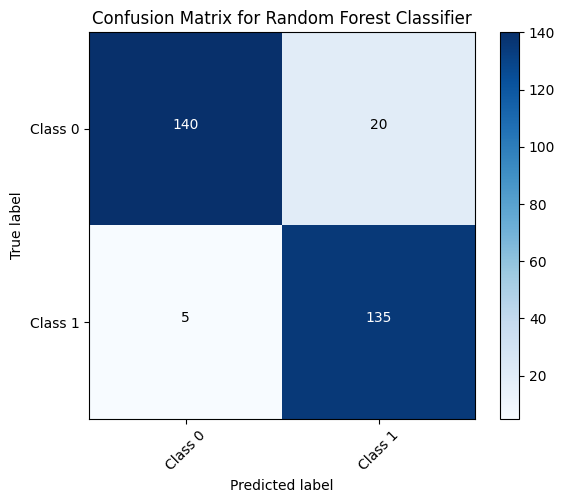

In [17]:
rf_clf_cm = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf_cm.fit(X_train_cls, y_train_cls)
y_pred_cm = rf_clf_cm.predict(X_test_cls)

cm = confusion_matrix(y_test_cls, y_pred_cm)

plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Class 0', 'Class 1'], rotation=45)
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.tight_layout()
plt.show()

###36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy


In [18]:
# Base estimators
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(random_state=42, probability=True)),
    ('lr', LogisticRegression(random_state=42, solver='liblinear'))
]

# Stacking Classifier
stk_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=42, solver='liblinear'), cv=5, n_jobs=-1)
stk_clf.fit(X_train_cls, y_train_cls)
y_pred_stk = stk_clf.predict(X_test_cls)
accuracy_stk = accuracy_score(y_test_cls, y_pred_stk)
print(f"Stacking Classifier Accuracy: {accuracy_stk:.4f}")

# Compare with individual base estimators (optional, but good for context)
print("Individual Base Estimator Accuracies:")
for name, estimator in estimators:
    estimator.fit(X_train_cls, y_train_cls)
    y_pred_base = estimator.predict(X_test_cls)
    acc_base = accuracy_score(y_test_cls, y_pred_base)
    print(f"  {name} Accuracy: {acc_base:.4f}")

Stacking Classifier Accuracy: 0.9533
Individual Base Estimator Accuracies:
  dt Accuracy: 0.8167
  svm Accuracy: 0.9500
  lr Accuracy: 0.8367


###37. Train a Random Forest Classifier and print the top 5 most important features


In [19]:
rf_clf_top_fi = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf_top_fi.fit(X_train_cls, y_train_cls)

# Assuming generic feature names for make_classification dataset
feature_names_cls = [f"Feature {i}" for i in range(X_cls.shape[1])]
feature_importances_top = pd.Series(rf_clf_top_fi.feature_importances_, index=feature_names_cls).sort_values(ascending=False)
print("Top 5 Most Important Features for Random Forest Classifier:")
print(feature_importances_top.head(5))


Top 5 Most Important Features for Random Forest Classifier:
Feature 11    0.116489
Feature 14    0.115176
Feature 17    0.086380
Feature 15    0.084577
Feature 7     0.069382
dtype: float64


###38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score


In [20]:
bag_clf_metrics = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42, n_jobs=-1)
bag_clf_metrics.fit(X_train_cls, y_train_cls)
y_pred_metrics = bag_clf_metrics.predict(X_test_cls)

precision = precision_score(y_test_cls, y_pred_metrics)
recall = recall_score(y_test_cls, y_pred_metrics)
f1 = f1_score(y_test_cls, y_pred_metrics)

print(f"Bagging Classifier Precision: {precision:.4f}")
print(f"Bagging Classifier Recall: {recall:.4f}")
print(f"Bagging Classifier F1-score: {f1:.4f}")

Bagging Classifier Precision: 0.8800
Bagging Classifier Recall: 0.9429
Bagging Classifier F1-score: 0.9103


###39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy


In [21]:
max_depth_list = [5, 10, 15, 20, None] # None means full depth
accuracy_by_depth = {}

for depth in max_depth_list:
    rf_clf_depth = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42, n_jobs=-1)
    rf_clf_depth.fit(X_train_cls, y_train_cls)
    y_pred_depth = rf_clf_depth.predict(X_test_cls)
    accuracy_by_depth[depth] = accuracy_score(y_test_cls, y_pred_depth)
    print(f"Random Forest Classifier with max_depth={depth} Accuracy: {accuracy_by_depth[depth]:.4f}")

Random Forest Classifier with max_depth=5 Accuracy: 0.8900
Random Forest Classifier with max_depth=10 Accuracy: 0.9133
Random Forest Classifier with max_depth=15 Accuracy: 0.9200
Random Forest Classifier with max_depth=20 Accuracy: 0.9167
Random Forest Classifier with max_depth=None Accuracy: 0.9167


###40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare


In [22]:
# Bagging Regressor with Decision Tree
bag_reg_dt_comp = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42), n_estimators=10, random_state=42, n_jobs=-1)
bag_reg_dt_comp.fit(X_train_reg, y_train_reg)
y_pred_bag_reg_dt_comp = bag_reg_dt_comp.predict(X_test_reg)
mse_bag_reg_dt_comp = mean_squared_error(y_test_reg, y_pred_bag_reg_dt_comp)
print(f"Bagging Regressor (Decision Tree) MSE: {mse_bag_reg_dt_comp:.4f}")

# Bagging Regressor with KNeighborsRegressor
bag_reg_knn_comp = BaggingRegressor(estimator=KNeighborsRegressor(n_neighbors=5), n_estimators=10, random_state=42, n_jobs=-1)
bag_reg_knn_comp.fit(X_train_reg, y_train_reg)
y_pred_bag_reg_knn_comp = bag_reg_knn_comp.predict(X_test_reg)
mse_bag_reg_knn_comp = mean_squared_error(y_test_reg, y_pred_bag_reg_knn_comp)
print(f"Bagging Regressor (KNeighbors Regressor) MSE: {mse_bag_reg_knn_comp:.4f}")

if mse_bag_reg_dt_comp < mse_bag_reg_knn_comp:
    print("Bagging Regressor with Decision Tree performs better (lower MSE).")
else:
    print("Bagging Regressor with KNeighbors Regressor performs better or equal (lower or equal MSE).")



Bagging Regressor (Decision Tree) MSE: 10581.2727
Bagging Regressor (KNeighbors Regressor) MSE: 17479.3828
Bagging Regressor with Decision Tree performs better (lower MSE).


###41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score


Random Forest Classifier ROC-AUC Score: 0.9799


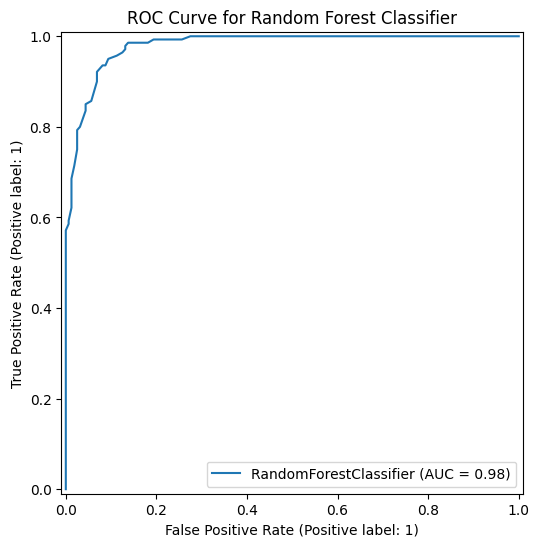

In [23]:
rf_clf_roc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf_roc.fit(X_train_cls, y_train_cls)
y_pred_proba_roc = rf_clf_roc.predict_proba(X_test_cls)[:, 1]
roc_auc = roc_auc_score(y_test_cls, y_pred_proba_roc)
print(f"Random Forest Classifier ROC-AUC Score: {roc_auc:.4f}")

# Visualize ROC curve
plt.figure(figsize=(7, 6))
RocCurveDisplay.from_estimator(rf_clf_roc, X_test_cls, y_test_cls, ax=plt.gca())
plt.title('ROC Curve for Random Forest Classifier')
plt.show()

###42. Train a Bagging Classifier and evaluate its performance using cross-validation


In [24]:
bag_clf_cv = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42, n_jobs=-1)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(bag_clf_cv, X_cls, y_cls, cv=kf, scoring='accuracy', n_jobs=-1)
print(f"Bagging Classifier Cross-validation Accuracy Scores: {cv_scores}")
print(f"Bagging Classifier Mean Cross-validation Accuracy: {np.mean(cv_scores):.4f}")
print(f"Bagging Classifier Std Dev of Cross-validation Accuracy: {np.std(cv_scores):.4f}")

Bagging Classifier Cross-validation Accuracy Scores: [0.9   0.935 0.94  0.91  0.89 ]
Bagging Classifier Mean Cross-validation Accuracy: 0.9150
Bagging Classifier Std Dev of Cross-validation Accuracy: 0.0195


###43. Train a Random Forest Classifier and plot the Precision-Recall curve


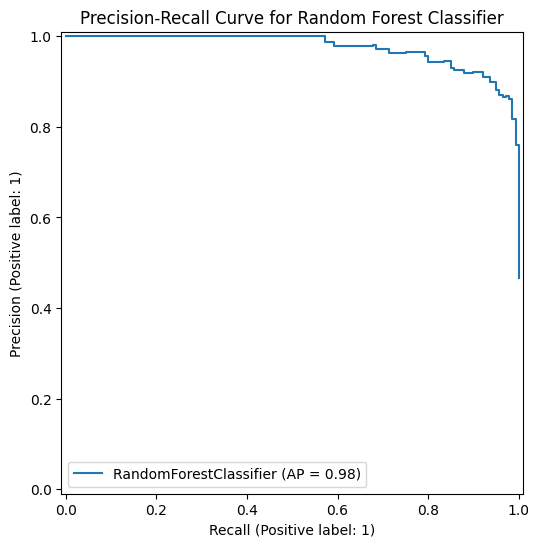

In [25]:
rf_clf_pr = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf_pr.fit(X_train_cls, y_train_cls)

plt.figure(figsize=(7, 6))
PrecisionRecallDisplay.from_estimator(rf_clf_pr, X_test_cls, y_test_cls, ax=plt.gca())
plt.title('Precision-Recall Curve for Random Forest Classifier')
plt.show()

###44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy


In [26]:
# Base estimators for stacking
estimators_stk2 = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)),
    ('lr', LogisticRegression(random_state=42, solver='liblinear'))
]

stk_clf2 = StackingClassifier(estimators=estimators_stk2, final_estimator=LogisticRegression(random_state=42, solver='liblinear'), cv=5, n_jobs=-1)
stk_clf2.fit(X_train_cls, y_train_cls)
y_pred_stk2 = stk_clf2.predict(X_test_cls)
accuracy_stk2 = accuracy_score(y_test_cls, y_pred_stk2)
print(f"Stacking Classifier (RF + LR) Accuracy: {accuracy_stk2:.4f}")

# Compare with individual RF accuracy
rf_clf_stk_base = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf_clf_stk_base.fit(X_train_cls, y_train_cls)
y_pred_rf_stk_base = rf_clf_stk_base.predict(X_test_cls)
accuracy_rf_stk_base = accuracy_score(y_test_cls, y_pred_rf_stk_base)
print(f"Random Forest (base for stacking) Accuracy: {accuracy_rf_stk_base:.4f}")

# Compare with individual LR accuracy
lr_stk_base = LogisticRegression(random_state=42, solver='liblinear')
lr_stk_base.fit(X_train_cls, y_train_cls)
y_pred_lr_stk_base = lr_stk_base.predict(X_test_cls)
accuracy_lr_stk_base = accuracy_score(y_test_cls, y_pred_lr_stk_base)
print(f"Logistic Regression (base for stacking) Accuracy: {accuracy_lr_stk_base:.4f}")

Stacking Classifier (RF + LR) Accuracy: 0.9067
Random Forest (base for stacking) Accuracy: 0.9100
Logistic Regression (base for stacking) Accuracy: 0.8367


###45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.


In [27]:
max_samples_list = [0.5, 0.7, 1.0] # proportion of samples to draw from X to train each base estimator
mse_by_bootstrap = {}

for ms in max_samples_list:
    bag_reg_bs = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42), n_estimators=100, max_samples=ms, random_state=42, n_jobs=-1)
    bag_reg_bs.fit(X_train_reg, y_train_reg)
    y_pred_bs = bag_reg_bs.predict(X_test_reg)
    mse_by_bootstrap[ms] = mean_squared_error(y_test_reg, y_pred_bs)
    print(f"Bagging Regressor with max_samples={ms} MSE: {mse_by_bootstrap[ms]:.4f}")


Bagging Regressor with max_samples=0.5 MSE: 10248.3408
Bagging Regressor with max_samples=0.7 MSE: 9674.2443
Bagging Regressor with max_samples=1.0 MSE: 9284.4126
